#Runtime

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00
time: 283 µs (started: 2024-04-05 05:12:56 +00:00)


#Pre-processing data

##Load Dataset

In [ ]:
!gdown "16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t"

Downloading...
From: https://drive.google.com/uc?id=16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t
To: /content/data_ws.zip
100% 21.8M/21.8M [00:00<00:00, 63.9MB/s]
time: 9.54 s (started: 2024-04-05 05:12:56 +00:00)


In [ ]:
!unzip data_ws.zip

Archive:  data_ws.zip
   creating: data_ws/
  inflating: data_ws/ws_0.jpg        
  inflating: data_ws/ws_1.jpg        
  inflating: data_ws/ws_10.jpg       
  inflating: data_ws/ws_100.jpg      
  inflating: data_ws/ws_1000.jpg     
  inflating: data_ws/ws_1001.jpg     
  inflating: data_ws/ws_1002.jpg     
  inflating: data_ws/ws_1003.jpg     
  inflating: data_ws/ws_1004.jpg     
  inflating: data_ws/ws_1005.jpg     
  inflating: data_ws/ws_1006.jpg     
  inflating: data_ws/ws_1007.jpg     
  inflating: data_ws/ws_1008.jpg     
  inflating: data_ws/ws_1009.jpg     
  inflating: data_ws/ws_101.jpg      
  inflating: data_ws/ws_1010.jpg     
  inflating: data_ws/ws_1011.jpg     
  inflating: data_ws/ws_1012.jpg     
  inflating: data_ws/ws_1013.jpg     
  inflating: data_ws/ws_1014.jpg     
  inflating: data_ws/ws_1015.jpg     
  inflating: data_ws/ws_1016.jpg     
  inflating: data_ws/ws_1017.jpg     
  inflating: data_ws/ws_1018.jpg     
  inflating: data_ws/ws_1019.jpg     
  infl

(240, 426, 3)


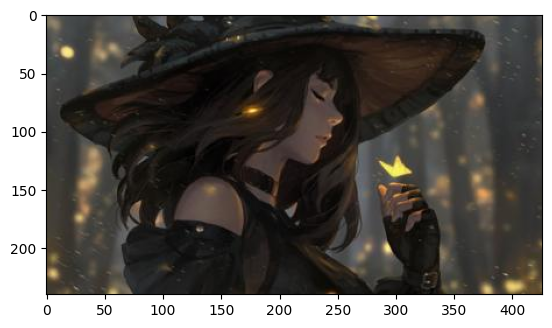

time: 1.05 s (started: 2024-04-05 05:13:06 +00:00)


In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data_ws/ws_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)
del img

##Splitting dataset to train, test and val

In [ ]:
import os
import random
import pandas as pd

# Path to your image folder
data_ws_dir = "/content/data_ws/"

# Get all image file paths
all_images = [os.path.join(data_ws_dir, filename) for filename in os.listdir(data_ws_dir)]

# Shuffle the paths randomly
# random.shuffle(all_images)
all_images_shuf = all_images
random.shuffle(all_images_shuf)

# Split paths
train_data_ws = all_images_shuf[:967]
remaining_data_ws = all_images_shuf[967:]
test_data_ws = remaining_data_ws[:len(remaining_data_ws)//2]
val_data_ws = remaining_data_ws[len(remaining_data_ws)//2:]

print(f"Images have been randomly distributed: {len(train_data_ws)} to train, {len(test_data_ws)} to test, and {len(val_data_ws)} to val subfolders.")

Images have been randomly distributed: 967 to train, 121 to test, and 121 to val subfolders.
time: 819 ms (started: 2024-04-05 05:13:07 +00:00)


#Model Implementation

###Define models

In [ ]:
import tensorflow as tf
from keras.applications import VGG19, ResNet50, ResNet50V2, InceptionV3, InceptionResNetV2, Xception
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

time: 4.27 s (started: 2024-04-05 05:13:08 +00:00)


A custom CNN model

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

def custom_cnn_model():
    # Define the Convolutional Autoencoder architecture
    input_img = Input(shape=(240, 426, 3))  # Input shape should match the image dimensions
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # This is the encoded representation of the input

    # Decoder
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # This is the reconstructed input
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

time: 1.66 ms (started: 2024-04-05 05:13:12 +00:00)


In [ ]:
vgg19 = VGG19(weights='imagenet', include_top=False)
resnet50 = ResNet50(weights='imagenet', include_top=False)
inceptionv3 = InceptionV3(weights='imagenet', include_top=False)
inceptionresnetv2 = InceptionResNetV2(weights='imagenet', include_top=False)
xception = Xception(weights='imagenet', include_top=False)
customCNN = custom_cnn_model()

83683744/83683744 [==============================] - 0s 0us/step
time: 37.4 s (started: 2024-04-05 05:13:12 +00:00)


In [ ]:
vgg19_name = 'vgg19'
resnet50_name = 'resnet50'
inceptionv3_name = 'inceptionv3'
inceptionresnetv2_name = 'inceptionresnetv2'
xception_name = 'xception'
customCNN_name = 'customCNN'

time: 751 µs (started: 2024-04-05 05:13:50 +00:00)


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from keras.applications.inception_v3 import preprocess_input as inceptionv3_preprocess_input
from keras.applications.inception_resnet_v2 import preprocess_input as inceptionresnetv2_preprocess_input
from keras.applications.xception import preprocess_input as xception_preprocess_input

time: 794 µs (started: 2024-04-05 05:13:50 +00:00)


In [ ]:
def customCNN_preprocess_input(input_array):
    input_array = input_array / 255.0
    return input_array

time: 419 µs (started: 2024-04-05 05:13:50 +00:00)


###Continue

In [ ]:
import numpy as np

time: 340 µs (started: 2024-04-05 05:13:50 +00:00)


In [ ]:
def load_images(image_paths):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(240, 426))
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

train_images = load_images(all_images)

time: 2.55 s (started: 2024-04-05 05:13:50 +00:00)


###Visualize clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

time: 598 µs (started: 2024-04-04 18:21:06 +00:00)


In [ ]:
n_clusters = 19
n_components = 2
random_state = 42

time: 531 µs (started: 2024-04-04 18:03:01 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


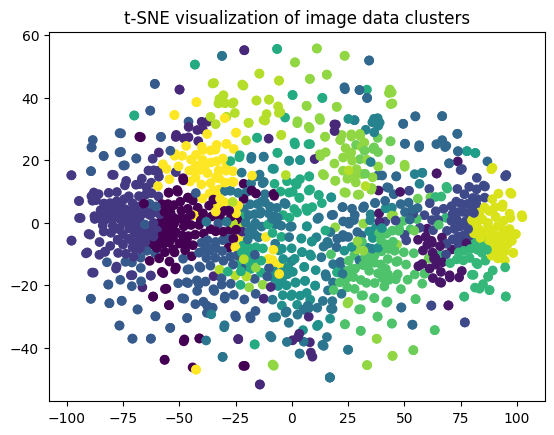

time: 10min 6s (started: 2024-04-04 08:10:59 +00:00)


In [ ]:
# Flatten the images for clustering
flattened_images = train_images.reshape(train_images.shape[0], -1)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)  # Change the number of clusters as needed
kmeans.fit(flattened_images)

# Perform t-SNE dimensionality reduction for visualization
tsne = TSNE(n_components=n_components, random_state=random_state)
reduced_data = tsne.fit_transform(flattened_images)

# Plot the data points in the reduced dimension space
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_)
plt.title('t-SNE visualization of image data clusters')
plt.show()


<ipython-input-19-0a195f04b176>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', n_clusters)


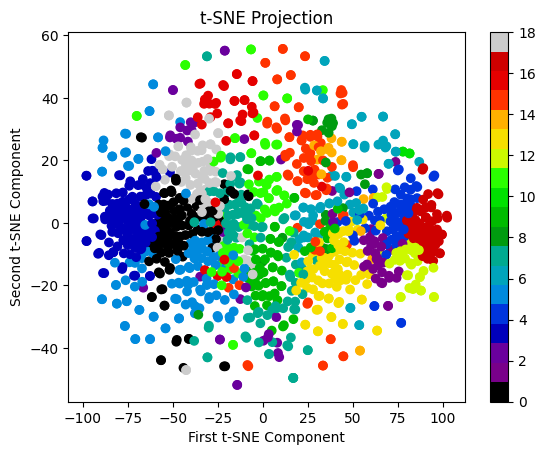

time: 493 ms (started: 2024-04-04 08:24:51 +00:00)


In [ ]:
cmap = plt.cm.get_cmap('nipy_spectral', n_clusters)

# Plot the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap=cmap)
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')
plt.title("t-SNE Projection")
plt.colorbar()
plt.show()

In [ ]:
del n_clusters
del flattened_images
del kmeans
del tsne
del reduced_data

time: 417 µs (started: 2024-04-04 18:03:25 +00:00)


###FUNCTIONS

In [ ]:
def preprocess_input(input_array, model_name):
    if model_name == 'vgg19':
        return vgg19_preprocess_input(input_array)

    elif model_name == 'resnet50':
        return resnet50_preprocess_input(input_array)

    elif model_name == 'inceptionv3':
        return inceptionv3_preprocess_input(input_array)

    elif model_name == 'inceptionresnetv2':
        return inceptionresnetv2_preprocess_input(input_array)

    elif model_name == 'xception':
        return xception_preprocess_input(input_array)

    elif model_name == 'customCNN':
        return customCNN_preprocess_input(input_array)

    else: return

time: 619 µs (started: 2024-04-05 05:13:52 +00:00)


In [ ]:
def extract_features(input_array, model_name):
    if model_name == 'vgg19':
        return vgg19.predict(input_array)

    elif model_name == 'resnet50':
        return resnet50.predict(input_array)

    elif model_name == 'inceptionv3':
        return inceptionv3.predict(input_array)

    elif model_name == 'inceptionresnetv2':
        return inceptionresnetv2.predict(input_array)

    elif model_name == 'xception':
        return xception.predict(input_array)

    elif model_name == 'customCNN':
        return customCNN.predict(input_array)

    else: return

time: 448 µs (started: 2024-04-05 05:13:52 +00:00)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from skimage.metrics import structural_similarity as ssim
from scipy.stats import wasserstein_distance
import matplotlib.image as mpimg

time: 1.46 s (started: 2024-04-05 05:13:52 +00:00)


In [ ]:
def compute_ssim(image1, image2):
    # Convert the images to grayscale
    image1_gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
    image2_gray = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

    # Compute SSIM between two images
    return ssim(image1_gray, image2_gray)

time: 667 µs (started: 2024-04-05 05:13:54 +00:00)


In [ ]:
def compute_histogram_similarity(image1, image2):
    # Compute the color histograms of the two images
    hist1 = cv2.calcHist([image1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist2 = cv2.calcHist([image2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

    # Normalize the histograms
    cv2.normalize(hist1, hist1)
    cv2.normalize(hist2, hist2)

    # Compute the correlation between the two histograms
    correlation = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

    return correlation

time: 903 µs (started: 2024-04-05 05:13:54 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def visualize_images(input_image_path, similar_image_paths, similarity_scores):
    # Load the input image
    input_image = cv2.imread(input_image_path)
    current_size = input_image.shape[:2]
    target_size = (240, 426)
    if current_size != target_size:
        # Resize the image
        input_image = cv2.resize(input_image, target_size)
    return input_image
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    # Display the input image and its histogram
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    image_name = {os.path.basename(input_image_path)}
    plt.title(f'Input Image\n {image_name}')
    plt.subplot(1, 2, 2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([input_image],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.title('Histogram')
    plt.show()

    # Check if there are any similar images
    if not any(score >= 0.5 for score in similarity_scores):
        print("No similar images exist.")
        return

    # Display the similar images and their histograms
    for i, image_path in enumerate(similar_image_paths):
        if similarity_scores[i] >= 0.5:
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Compute the SSIM and histogram correlation scores
            ssim_score = compute_ssim(input_image, image)
            hist_corr_score = compute_histogram_similarity(input_image, image)

            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(image)
            image_name = {os.path.basename(image_path)}
            plt.title(f'Similar Image {i+1}\n Image Name: {image_name}\n cosine similarity: {similarity_scores[i]*100:.2f}%\n SSIM: {ssim_score*100:.2f}%\n hist correlation: {hist_corr_score*100:.2f}%')
            plt.subplot(1, 2, 2)
            for i,col in enumerate(color):
                histr = cv2.calcHist([image],[i],None,[256],[0,256])
                plt.plot(histr,color = col)
                plt.xlim([0,256])
            plt.title('Histogram')
            plt.show()

time: 12.2 ms (started: 2024-04-05 05:13:54 +00:00)


In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def image_similarity(input_image_path, model_name, n_neighbors=5):
    # Load and preprocess the input image
    input_image = load_img(input_image_path, target_size=(240, 426))
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    input_array = img_to_array(input_image)
    print(f"input_array -  {input_array.shape}")
    input_array = np.expand_dims(input_array, axis=0)

    print(f"input_array -  {input_array.shape}")

    # Preprocess the input for the chosen model
    input_preprocessed = preprocess_input(input_array, model_name)
    print(f"input_preprocess:  {input_preprocessed.shape}")
    del input_array

    # Extract features from the input
    input_features = extract_features(input_preprocessed, model_name)
    print(f"input_features: {input_features.shape}")
    del input_preprocessed

    # Flatten the input features
    input_features_flat = input_features.reshape(input_features.shape[0], -1)
    print(f"input_features_flat {input_features_flat.shape}")
    del input_features

    # Preprocess the training images for the chosen model
    train_images_preprocessed = preprocess_input(train_images, model_name)

    # Extract features from the training images
    train_features = extract_features(train_images_preprocessed, model_name)
    del train_images_preprocessed

    # Flatten the training features
    train_features_flat = train_features.reshape(train_features.shape[0], -1)
    del train_features

    # Train a k-NN model
    knn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    knn.fit(train_features_flat)

    # Use the k-NN model to find the top 5 most similar images
    distances, indices = knn.kneighbors(input_features_flat)
    del knn

    # Get the image paths and similarity scores of the top 5 most similar images
    top_5_image_paths = [all_images[i] for i in indices[0]]
    top_5_similarity_scores = [1 - d for d in distances[0]]  # Convert distances to similarity scores

    # Visualize images
    visualize_images(input_image_path, top_5_image_paths, top_5_similarity_scores)

    # Apply t-SNE to the features
    tsne = TSNE(n_components=2, random_state=0)
    all_features_flat = np.concatenate((input_features_flat, train_features_flat), axis=0)
    all_features_2d = tsne.fit_transform(all_features_flat)

    del train_features_flat

    # Visualize the t-SNE output
    plt.figure(figsize=(10, 7))
    plt.title(f't-SNE Visualization for {model_name}')
    plt.scatter(all_features_2d[1:, 0], all_features_2d[1:, 1], label='Training Images')
    plt.scatter(all_features_2d[0, 0], all_features_2d[0, 1], label='Input Image', c='red')
    plt.legend()
    plt.show()

    return top_5_image_paths, top_5_similarity_scores

time: 4.94 ms (started: 2024-04-05 05:17:37 +00:00)


#TESTING

In [ ]:
input_image_path = all_images[999]

time: 407 µs (started: 2024-04-05 05:13:54 +00:00)


In [ ]:
input_image_path = r"/content/100045.jpg"

time: 503 µs (started: 2024-04-05 05:18:16 +00:00)


input_array -  (240, 426, 3)
input_array -  (1, 240, 426, 3)
input_preprocess:  (1, 240, 426, 3)
1/1 [==============================] - 0s 32ms/step
input_features: (1, 7, 13, 512)
input_features_flat (1, 46592)
38/38 [==============================] - 12s 325ms/step


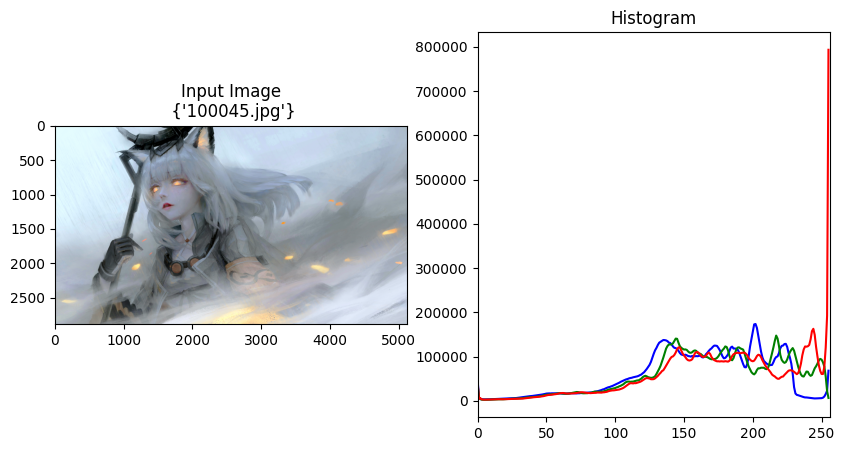

ValueError: Input images must have the same dimensions.

time: 21.1 s (started: 2024-04-05 05:17:41 +00:00)


In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, vgg19_name)
del top_5_image_paths
del top_5_similarity_scores

38/38 [==============================] - 13s 258ms/step


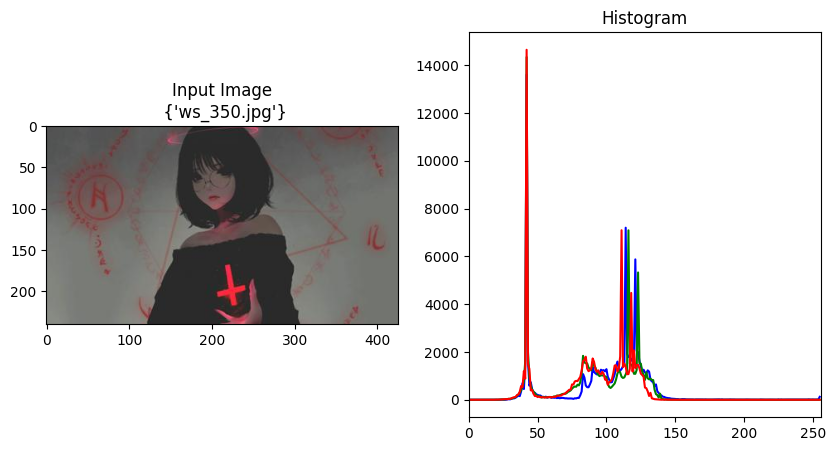

No similar images exist.


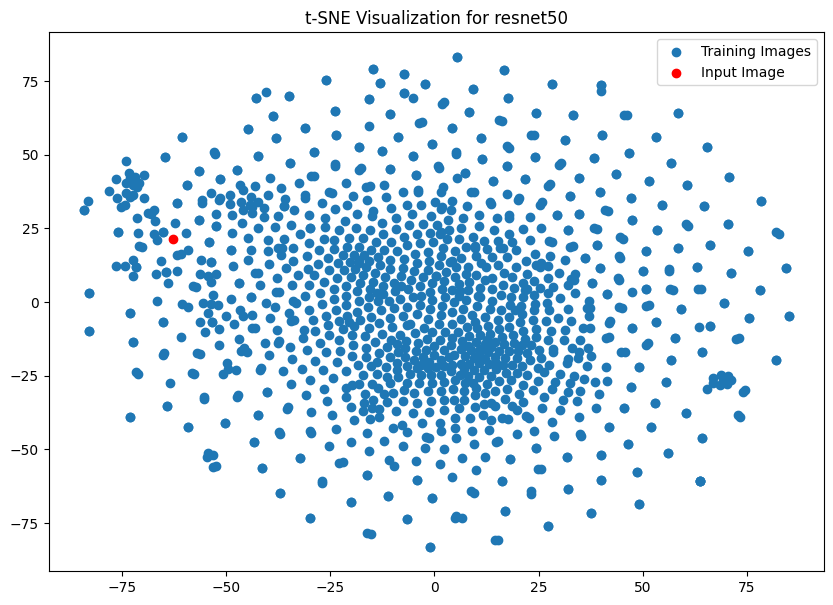

time: 1min 16s (started: 2024-04-05 04:14:13 +00:00)


In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, resnet50_name)
del top_5_image_paths
del top_5_similarity_scores

input_array -  (240, 426, 3)
input_preprocess:  [[[[-0.3490196  -0.3490196  -0.3490196 ]
   [-0.3490196  -0.3490196  -0.3490196 ]
   [-0.35686272 -0.35686272 -0.35686272]
   ...
   [-0.26274508 -0.26274508 -0.26274508]
   [-0.24705881 -0.24705881 -0.24705881]
   [-0.24705881 -0.24705881 -0.24705881]]

  [[-0.34117645 -0.34117645 -0.34117645]
   [-0.3490196  -0.3490196  -0.3490196 ]
   [-0.3490196  -0.3490196  -0.3490196 ]
   ...
   [-0.26274508 -0.26274508 -0.26274508]
   [-0.24705881 -0.24705881 -0.24705881]
   [-0.24705881 -0.24705881 -0.24705881]]

  [[-0.34117645 -0.34117645 -0.34117645]
   [-0.34117645 -0.34117645 -0.34117645]
   [-0.3490196  -0.3490196  -0.3490196 ]
   ...
   [-0.25490195 -0.25490195 -0.25490195]
   [-0.24705881 -0.24705881 -0.24705881]
   [-0.24705881 -0.24705881 -0.24705881]]

  ...

  [[ 0.06666672  0.09019613  0.03529418]
   [ 0.06666672  0.09019613  0.03529418]
   [ 0.06666672  0.09019613  0.03529418]
   ...
   [-0.10588235 -0.09019607 -0.12941176]
   [-0.10

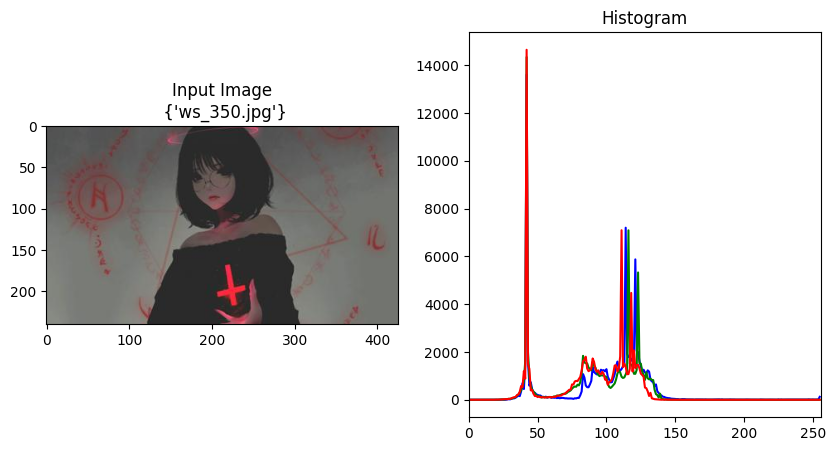

No similar images exist.


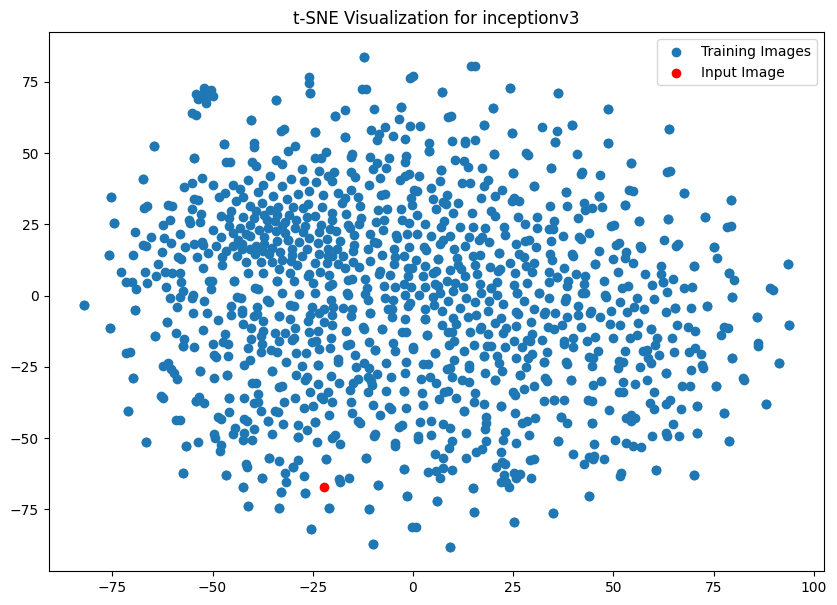

time: 39.1 s (started: 2024-04-05 04:21:51 +00:00)


In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, inceptionv3_name)
del top_5_image_paths
del top_5_similarity_scores

input_array -  (240, 426, 3)
input_preprocess:  [[[[-0.3490196  -0.3490196  -0.3490196 ]
   [-0.3490196  -0.3490196  -0.3490196 ]
   [-0.35686272 -0.35686272 -0.35686272]
   ...
   [-0.26274508 -0.26274508 -0.26274508]
   [-0.24705881 -0.24705881 -0.24705881]
   [-0.24705881 -0.24705881 -0.24705881]]

  [[-0.34117645 -0.34117645 -0.34117645]
   [-0.3490196  -0.3490196  -0.3490196 ]
   [-0.3490196  -0.3490196  -0.3490196 ]
   ...
   [-0.26274508 -0.26274508 -0.26274508]
   [-0.24705881 -0.24705881 -0.24705881]
   [-0.24705881 -0.24705881 -0.24705881]]

  [[-0.34117645 -0.34117645 -0.34117645]
   [-0.34117645 -0.34117645 -0.34117645]
   [-0.3490196  -0.3490196  -0.3490196 ]
   ...
   [-0.25490195 -0.25490195 -0.25490195]
   [-0.24705881 -0.24705881 -0.24705881]
   [-0.24705881 -0.24705881 -0.24705881]]

  ...

  [[ 0.06666672  0.09019613  0.03529418]
   [ 0.06666672  0.09019613  0.03529418]
   [ 0.06666672  0.09019613  0.03529418]
   ...
   [-0.10588235 -0.09019607 -0.12941176]
   [-0.10

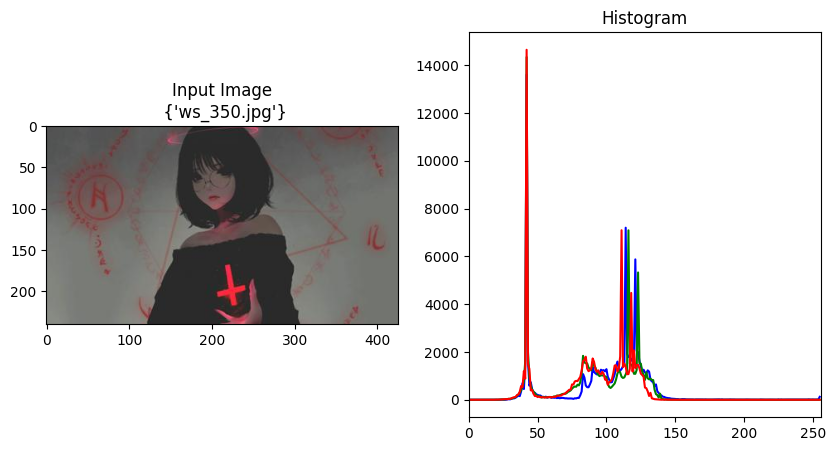

No similar images exist.


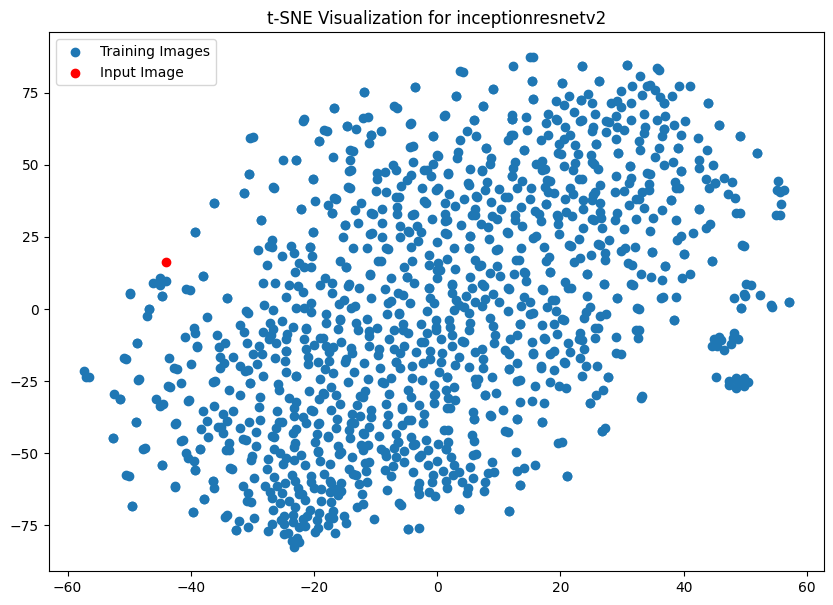

time: 53.5 s (started: 2024-04-05 04:32:21 +00:00)


In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, inceptionresnetv2_name)
del top_5_image_paths
del top_5_similarity_scores

input_array -  (240, 426, 3)
input_array -  (1, 240, 426, 3)
input_preprocess:  (1, 240, 426, 3)
1/1 [==============================] - 0s 21ms/step
input_features: [[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.03681342 ... 0.         0.
    0.        ]
   [0.         0.         0.40450957 ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         .

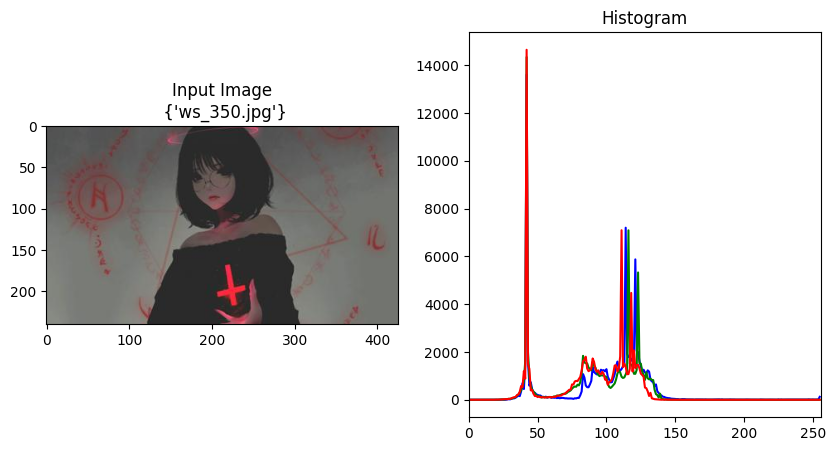

No similar images exist.


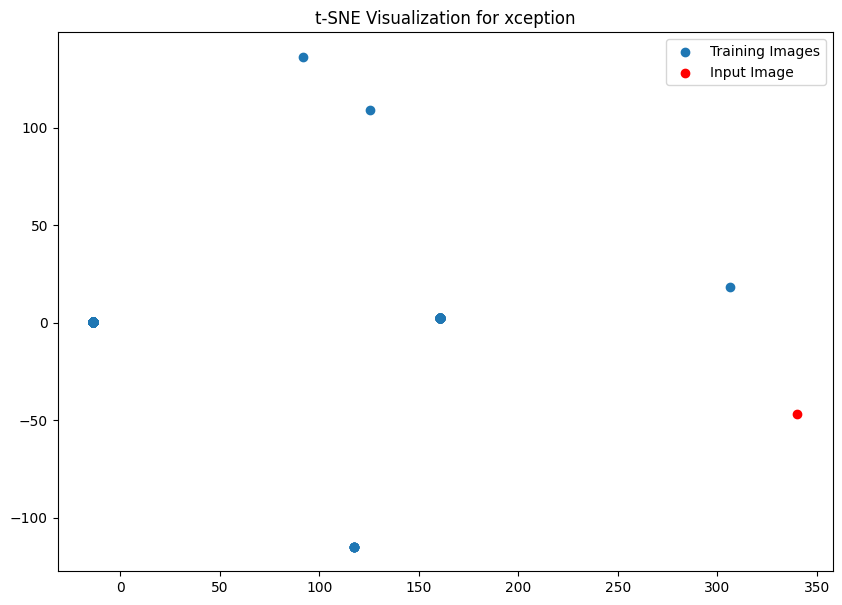

time: 1min 2s (started: 2024-04-05 04:33:41 +00:00)


In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, xception_name)
del top_5_image_paths
del top_5_similarity_scores

input_array -  (240, 426, 3)
input_array -  (1, 240, 426, 3)
input_preprocess:  (1, 240, 426, 3)
1/1 [==============================] - 3s 3s/step
input_features: (1, 240, 432, 3)
input_features_flat (1, 311040)
38/38 [==============================] - 9s 139ms/step


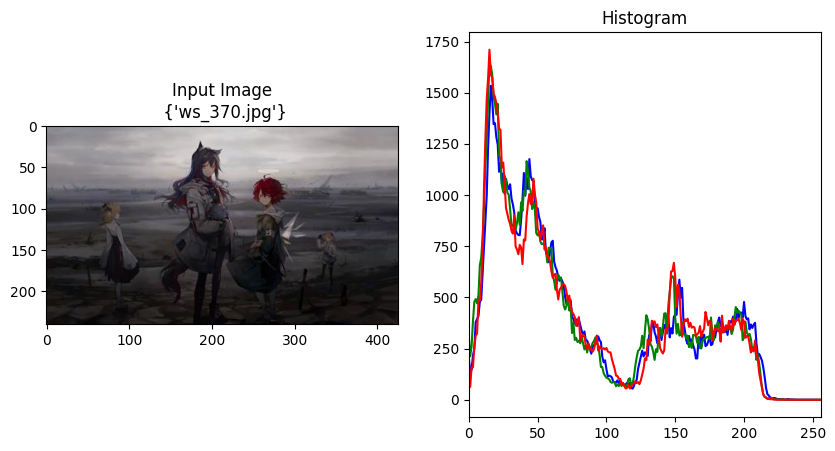

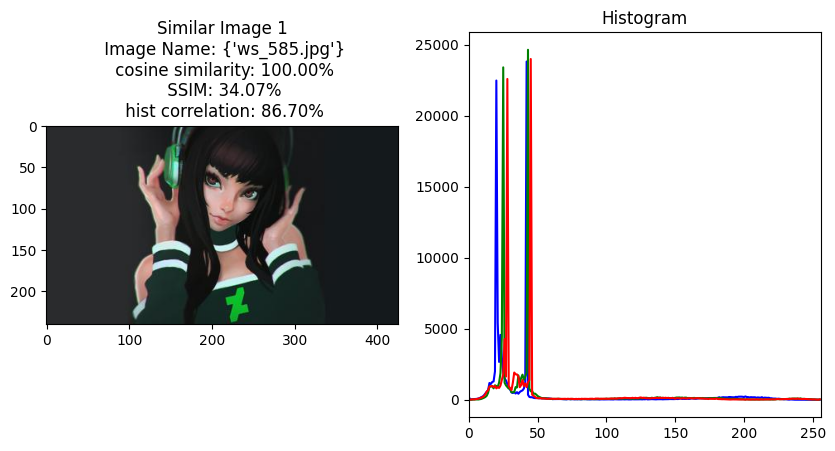

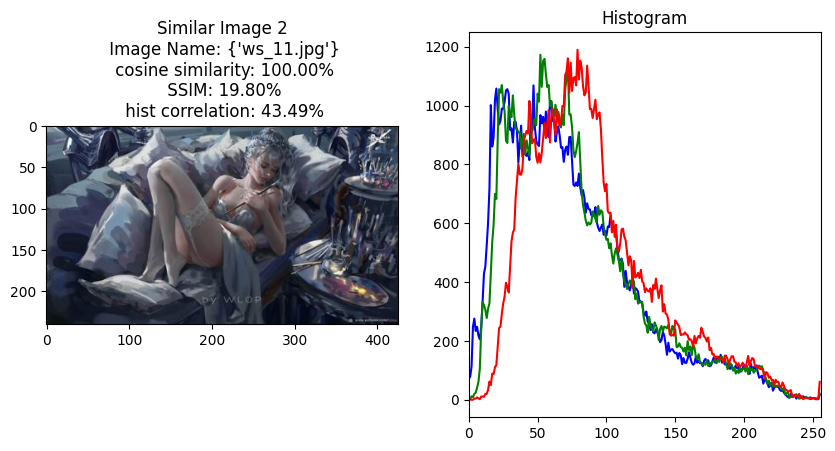

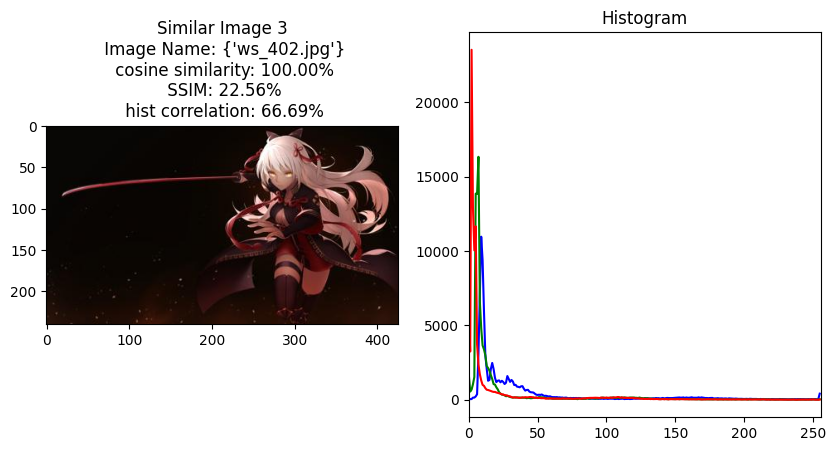

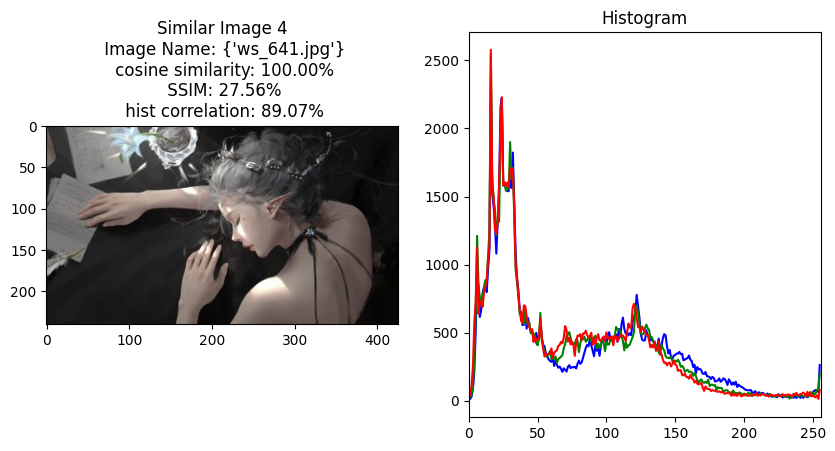

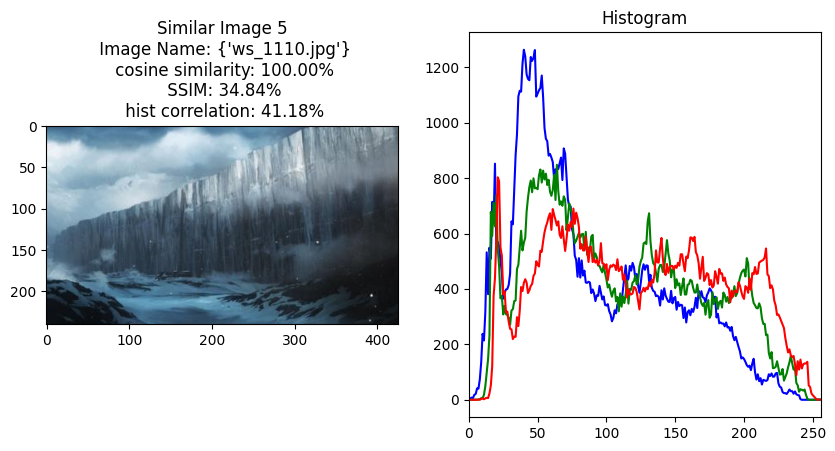

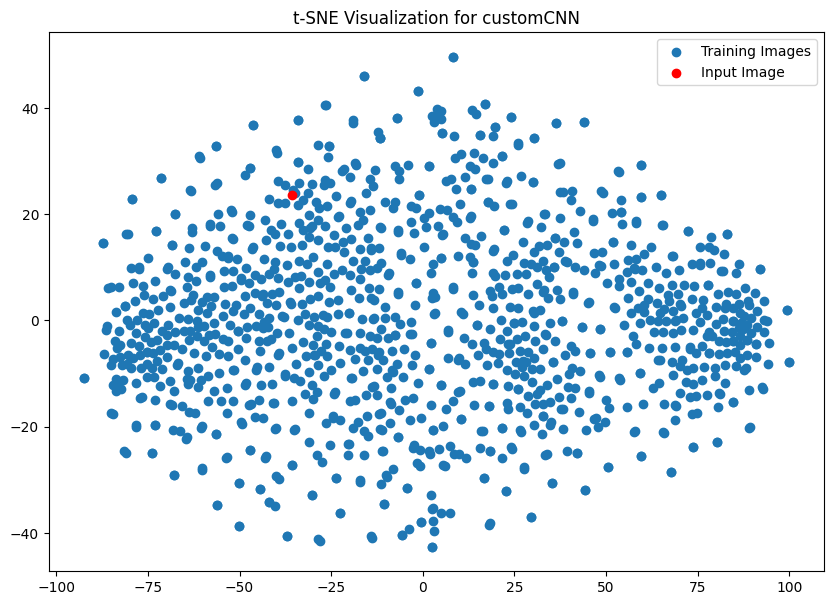

time: 1min 21s (started: 2024-04-05 04:37:11 +00:00)


In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, customCNN_name)
del top_5_image_paths
del top_5_similarity_scores